### ***1/ import the library***

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

### ***2/ Path definition***

In [3]:

base_path = "./kaggle/input/march-machine-learning-mania-2025/"

# Loading files
df_season = pd.read_csv(os.path.join(base_path, "MRegularSeasonDetailedResults.csv"))
df_submission = pd.read_csv(os.path.join(base_path, "SampleSubmissionStage2.csv"))

# List of statistics used
stat_cols = ["WScore", "LScore", "WFGM", "WFGA", "WFGM3", "WFGA3", "WFTM", "WFTA", "WAst", "WTO", "WOR", "WDR"]

### ***3/ Creation of average statistics per team***

In [4]:
team_stats = df_season.groupby("WTeamID").agg({col: "mean" for col in stat_cols}).reset_index()
team_stats.rename(columns={"WTeamID": "TeamID"}, inplace=True)

In [5]:
team_stats.head()

,TeamID,WScore,LScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WAst,WTO,WOR,WDR
0,1101,76.608108,65.364865,26.398649,55.871622,7.222973,18.925676,16.587838,22.648649,15.162162,12.729730,8.675676,22.986486
1,1102,70.122807,57.308772,23.877193,48.561404,8.557895,21.214035,13.810526,19.157895,15.782456,11.284211,7.070175,22.957895
2,1103,75.768898,63.248380,26.049676,55.710583,8.604752,22.749460,15.064795,21.589633,14.853132,12.274298,10.362851,24.853132
3,1104,77.849658,64.198178,26.917995,57.485194,7.785877,21.580866,16.227790,23.015945,14.170843,13.173121,11.665148,26.961276
4,1105,73.000000,63.035354,24.595960,56.358586,6.060606,17.797980,17.747475,25.919192,13.434343,14.590909,11.878788,26.530303


In [6]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TeamID  371 non-null    int64  
 1   WScore  371 non-null    float64
 2   LScore  371 non-null    float64
 3   WFGM    371 non-null    float64
 4   WFGA    371 non-null    float64
 5   WFGM3   371 non-null    float64
 6   WFGA3   371 non-null    float64
 7   WFTM    371 non-null    float64
 8   WFTA    371 non-null    float64
 9   WAst    371 non-null    float64
 10  WTO     371 non-null    float64
 11  WOR     371 non-null    float64
 12  WDR     371 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 37.8 KB


In [7]:
team_stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TeamID,371.0,1291.606469,109.110563,1101.000000,1197.500000,1291.000000,1385.500000,1480.000000
WScore,371.0,75.650485,2.669996,68.244444,73.828311,75.616216,77.265967,84.870000
LScore,371.0,64.278099,2.640583,56.512931,62.550010,64.186301,65.758303,74.680000
WFGM,371.0,26.268042,1.056027,23.400000,25.518731,26.315789,26.980099,30.289179
WFGA,371.0,55.602923,1.895163,48.500000,54.428277,55.714286,56.978552,62.897388
WFGM3,371.0,7.376709,0.791858,5.505300,6.865900,7.313580,7.820023,10.789474
WFGA3,371.0,19.380881,1.923654,14.947368,18.111554,19.201439,20.508167,28.630000
WFTM,371.0,15.737692,1.028530,11.891304,15.000474,15.736156,16.427708,18.505747
WFTA,371.0,21.998810,1.486734,15.260870,21.024010,22.016575,23.079185,26.148810
WAst,371.0,14.554526,1.067169,11.666667,13.812880,14.530364,15.252113,18.011583


In [8]:
team_stats.describe().transpose().sum()

count    4823.000000
mean     1640.749395
std       126.913744
min      1390.537506
25%      1535.284424
50%      1640.152127
75%      1745.786291
max      1892.286159
dtype: float64

In [9]:
team_stats.isnull().sum()

TeamID    0
WScore    0
LScore    0
WFGM      0
WFGA      0
WFGM3     0
WFGA3     0
WFTM      0
WFTA      0
WAst      0
WTO       0
WOR       0
WDR       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

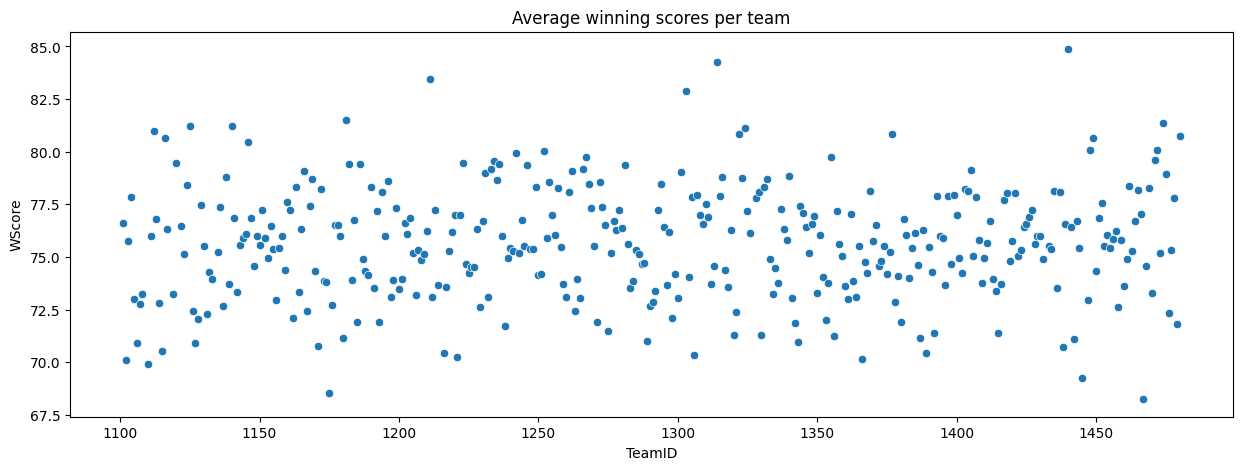

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure (figsize=(15, 5))
sns.scatterplot(data = team_stats , x = 'TeamID', y = 'WScore',)

plt.title('Average winning scores per team')
plt.show

### ***4/ creation of features for training***

In [11]:
def create_features(df):
    df["Team1"] = df[["WTeamID", "LTeamID"]].min(axis=1)
    df["Team2"] = df[["WTeamID", "LTeamID"]].max(axis=1)
    df["Label"] = (df["WTeamID"] == df["Team1"]).astype(int)

    df = df.drop(columns=stat_cols, errors="ignore")

    df = df.merge(team_stats, left_on="Team1", right_on="TeamID", how="left")
    rename_dict_T1 = {col: col + "_T1" for col in stat_cols}
    df.rename(columns=rename_dict_T1, inplace=True)
    df.drop("TeamID", axis=1, inplace=True)

    df = df.merge(team_stats, left_on="Team2", right_on="TeamID", how="left", suffixes=("", "_T2"))
    rename_dict_T2 = {col: col + "_T2" for col in stat_cols}
    df.rename(columns=rename_dict_T2, inplace=True)
    df.drop("TeamID", axis=1, inplace=True)

    for col in stat_cols:
        df["Diff_" + col] = df[col + "_T1"] - df[col + "_T2"]

    return df

### ***5/ Apply the function on the seasonal data***

In [12]:
df_train = create_features(df_season.copy())

# 📌 Sélection des features et de la target
feature_cols = ["Diff_" + col for col in stat_cols]
X = df_train[feature_cols]
y = df_train["Label"]

### ***6/ Transformation pipeline***

In [ ]:

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", lgb.LGBMClassifier(random_state=42))
])

# Hyperparameter optimization with RandomizedSearchCV
param_grid = {
    'model__n_estimators': [500, 1000, 1500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [5, 7, 10],
    'model__num_leaves': [31, 50, 70],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}

search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=3, scoring='neg_brier_score', random_state=42, n_jobs=-1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

search.fit(X_train, y_train)
print("Meilleurs hyperparamètres :", search.best_params_)

#### ***7/ Evaluation***

In [ ]:
y_val_proba = search.best_estimator_.predict_proba(X_val)[:, 1]
brier = brier_score_loss(y_val, y_val_proba)
print("Brier score loss sur validation:", brier)

Brier score loss sur validation: 0.21541581586406133


### ***8/ Creation of features for submission***

In [ ]:
def create_features_submission(df):
    df[["Season", "Team1", "Team2"]] = df["ID"].str.split("_", expand=True)
    df["Team1"] = df["Team1"].astype(int)
    df["Team2"] = df["Team2"].astype(int)

    df = df.merge(team_stats, left_on="Team1", right_on="TeamID", how="left")
    rename_dict_T1 = {col: col + "_T1" for col in stat_cols}
    df.rename(columns=rename_dict_T1, inplace=True)
    df.drop("TeamID", axis=1, inplace=True)

    df = df.merge(team_stats, left_on="Team2", right_on="TeamID", how="left", suffixes=("", "_T2"))
    rename_dict_T2 = {col: col + "_T2" for col in stat_cols}
    df.rename(columns=rename_dict_T2, inplace=True)
    df.drop("TeamID", axis=1, inplace=True)

    for col in stat_cols:
        df["Diff_" + col] = df[col + "_T1"] - df[col + "_T2"]

    return df

df_sub = create_features_submission(df_submission.copy())

In [ ]:
# Selection of the same features as for training
X_sub = df_sub[feature_cols]

# Prediction for submission
df_submission["Pred"] = search.best_estimator_.predict_proba(X_sub)[:, 1]

### ***9/ Saving the submission file***

In [ ]:
df_submission[["ID", "Pred"]].to_csv("submission.csv", index=False)
print("Fichier de soumission généré avec succès !")

Fichier de soumission généré avec succès !
